In [1]:
import numpy as np

# Set the number of data points
num_points = 25000

# Set the proportion of anomalies in the data
anomaly_proportion = 0.1

# Generate data for class 0 (normal data)
class_0 = np.random.normal(loc=0, scale=1, size=(int(num_points*(1-anomaly_proportion)), 2))

# Generate data for class 1 (anomalies)
class_1 = np.random.normal(loc=4, scale=2, size=(int(num_points*anomaly_proportion), 2))

# Concatenate the data
data = np.concatenate((class_0, class_1), axis=0)

# Create labels for the data (0 for normal data and 1 for anomalies)
labels = np.concatenate((np.zeros(int(num_points*(1-anomaly_proportion))), np.ones(int(num_points*anomaly_proportion))), axis=0)

# Shuffle the data and labels
shuffle_idx = np.random.permutation(num_points)
data = data[shuffle_idx]
labels = labels[shuffle_idx]

# Print the first 5 rows of data and labels
print(data[:5])
print(labels[:5])


[[-1.96810028 -1.42687866]
 [-1.22856853 -0.38438225]
 [ 0.58844536 -1.26004068]
 [ 0.50809459  0.80123362]
 [ 0.01130823 -1.15336416]]
[0. 0. 0. 0. 0.]


In [2]:
type(labels)

numpy.ndarray

In [3]:
unique_values, counts = np.unique(labels, return_counts=True)

# print the frequency counts
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0.0: 22500
1.0: 2500


In [4]:
type(data)

numpy.ndarray

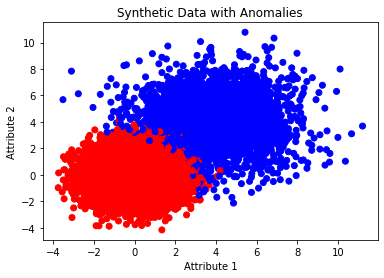

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors for anomalies
colors = ['blue' if label == 1 else 'red' for label in labels]

# Plot data
plt.scatter(data[:, 0], data[:, 1], c=colors)
plt.title("Synthetic Data with Anomalies")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()



In [6]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(123)

# Define the number of rows in the dataset
T = 20000

# Define the percentage of anomalies in the data
anomaly_pct = 0.1

# Generate the class labels for the dataset
y = np.zeros(T, dtype=int)
anomaly_idx = np.random.choice(T, int(anomaly_pct * T), replace=False)
y[anomaly_idx] = 1

# Generate the features for the dataset
X = np.zeros((T, 2))

# Add point anomalies
X[anomaly_idx[:int(len(anomaly_idx)/4)]] = np.random.normal(loc=[-5, 5], scale=[0.5, 0.5], size=(int(len(anomaly_idx)/4), 2))
X[anomaly_idx[int(len(anomaly_idx)/4):int(len(anomaly_idx)/2)]] = np.random.normal(loc=[5, -5], scale=[0.5, 0.5], size=(int(len(anomaly_idx)/4), 2))

# Add sudden frequency change
X[5000:10000] = np.random.normal(loc=[0, 0], scale=[1, 1], size=(5000, 2))
X[anomaly_idx[int(len(anomaly_idx)/2):int(len(anomaly_idx)*3/4)]] = np.random.normal(loc=[10, 0], scale=[1, 1], size=(int(len(anomaly_idx)/4), 2))

# Add continuous concept drift
X[15000:17500] = np.random.normal(loc=[0, 0], scale=[1, 1], size=(2500, 2))
X[anomaly_idx[int(len(anomaly_idx)*3/4):]] = np.random.normal(loc=[10, 10], scale=[1, 1], size=(int(len(anomaly_idx)/4), 2))

# Add sudden concept drift due to mean change
X[12500:15000] = np.random.normal(loc=[0, 0], scale=[1, 1], size=(2500, 2))
X[anomaly_idx[int(len(anomaly_idx)/2):int(len(anomaly_idx)*3/4)]] = np.random.normal(loc=[10, 0], scale=[1, 1], size=(int(len(anomaly_idx)/4), 2))

# Clip the anomaly scores
X = np.clip(X, a_min=T/8, a_max=T/8*3)

# Print the shape of the dataset
print("Shape of the dataset:", X.shape)


Shape of the dataset: (20000, 2)


In [7]:
import numpy as np

np.random.seed(42)

# Define the parameters for the synthetic dataset
T = 20000
anomaly_fraction = 0.1
anomaly_scores_clip = (12500, 19000)

# Generate the labels for the dataset
labels = np.zeros(T)
anomaly_indices = np.random.choice(T, int(T * anomaly_fraction), replace=False)
labels[anomaly_indices] = 1

# Generate the data for the dataset
data = np.zeros((T, 2))

# Generate point anomalies
point_anomaly_indices = np.random.choice(anomaly_indices, int(T * anomaly_fraction * 0.25), replace=False)
data[point_anomaly_indices, :] = np.random.normal(loc=5, scale=1, size=(len(point_anomaly_indices), 2))

# Generate sudden frequency change
freq_change_indices = np.random.choice(np.arange(5000, 10000), int(T * anomaly_fraction * 0.25), replace=False)
data[freq_change_indices, :] = np.random.normal(loc=5, scale=1, size=(len(freq_change_indices), 2))

# Generate continuous concept drift
concept_drift_indices = np.arange(15000, 17500)
data[concept_drift_indices, :] = np.random.normal(loc=5, scale=1, size=(len(concept_drift_indices), 2))

# Generate sudden concept drift due to mean change
sudden_drift_indices = np.random.choice(np.arange(12500, 15000), int(T * anomaly_fraction * 0.25), replace=False)
data[sudden_drift_indices, :] = np.random.normal(loc=10, scale=1, size=(len(sudden_drift_indices), 2))

# Clip the anomaly scores
anomaly_scores = np.zeros(T)
anomaly_scores[anomaly_indices] = 1
anomaly_scores = np.clip(anomaly_scores, anomaly_scores_clip[0], anomaly_scores_clip[1])

# Print the number of anomalies in the dataset
print("Number of anomalies: ", int(np.sum(labels)))


Number of anomalies:  2000


In [8]:
import numpy as np
import random

# Parameters for the dataset
T = 20000
anomaly_percentage = 0.1
freq_change_start = 5000
freq_change_end = 10000
concept_drift_start = 15000
concept_drift_end = 17500
mean_change_start = 12500
mean_change_end = 15000

# Create dataset
data = []
labels = []
for i in range(T):
    # Generate random value
    val = random.uniform(-1, 1)
    # Determine label based on anomaly conditions
    if i < T*anomaly_percentage:
        label = 1
    elif i >= freq_change_start and i < freq_change_end:
        if random.random() < 0.2:
            val = random.uniform(-5, 5)
            label = 1
        else:
            label = 0
    elif i >= concept_drift_start and i < concept_drift_end:
        val += 0.02
        if random.random() < 0.1:
            val = random.uniform(-1, 1)
            label = 1
        else:
            label = 0
    elif i >= mean_change_start and i < mean_change_end:
        val += 0.3
        if random.random() < 0.4:
            val = random.uniform(-1, 1)
            label = 1
        else:
            label = 0
    else:
        label = 0
    # Append data and label
    data.append(val)
    labels.append(label)

# Clip anomaly scores
clip_start = 12500
clip_end = 19000
for i in range(len(data)):
    if i < clip_start:
        labels[i] = 0
    elif i >= clip_end:
        labels[i] = 0
    else:
        labels[i] = min(labels[i], clip_end)

print(len(data))

# Save data and labels separately as txt
np.savetxt('syn_1.txt', data)
np.savetxt('synlabels_1.txt', labels)


20000


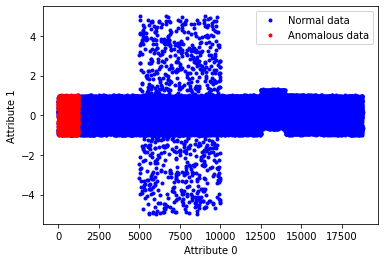

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data and labels
data = pd.read_csv("syn_1.txt", sep="\t", header=None)

labels = pd.read_csv("synlabels_1.txt", sep="\t", header=None)

# Plot the concept drift from data and labels
fig, ax = plt.subplots()

# Plot the normal data in blue
normal_data = data[labels[0] == 0].reset_index(drop=True)

ax.plot(normal_data[0], '.', color='blue', label='Normal data')

# Plot the anomalous data in red
anomalous_data = data[labels[0] == 1].reset_index(drop=True)
ax.plot(anomalous_data[0], '.', color='red', label='Anomalous data')

# Add axis labels and legend
ax.set_xlabel('Attribute 0')
ax.set_ylabel('Attribute 1')
ax.legend()
plt.show()


In [10]:
import numpy as np

# set random seed for reproducibility
np.random.seed(42)

# create dataset with 2 attributes and 20000 rows
data = np.random.rand(20000, 2)

# create labels for normal and anomalous data
labels = np.zeros(20000)
labels[12500:19000] = 1

# add point anomalies
data[1000] = [0.2, 0.8]
data[2500] = [0.7, 0.3]
data[3500] = [0.3, 0.7]
data[5500] = [0.8, 0.2]
data[7000] = [0.4, 0.6]
data[8500] = [0.6, 0.4]
data[9500] = [0.2, 0.8]
data[11500] = [0.8, 0.2]
data[13000] = [0.6, 0.4]
data[15500] = [0.3, 0.7]
data[16500] = [0.7, 0.3]
data[18500] = [0.8, 0.2]

# add sudden frequency change
for i in range(5000, 10000):
    if i % 50 == 0:
        data[i] = [0.2, 0.8]

# add continuous concept drift
for i in range(15000, 17500):
    data[i][0] += (i - 15000) * 0.0001
    data[i][1] -= (i - 15000) * 0.0001

# add sudden concept drift due to mean change
for i in range(12500, 15000):
    if i < 13750:
        data[i][0] += (i - 12500) * 0.0001
        data[i][1] -= (i - 12500) * 0.0001
    else:
        data[i][0] -= (i - 13750) * 0.0001
        data[i][1] += (i - 13750) * 0.0001

# clip anomaly scores
labels = np.clip(labels, 0, 12500)
labels = np.clip(labels, 0, 19000)

# save labels and dataset as .txt
np.savetxt('labels_syn.txt', labels, fmt='%d')
np.savetxt('dataset_syn.txt', data, fmt='%.4f')


In [31]:
import numpy as np
import pandas as pd

# Define parameters
T = 20000
anomaly_frac = 0.1

# Generate random data
data = pd.DataFrame(np.random.rand(T, 1), columns=['X'])

# Generate point anomalies
point_anomalies = np.random.choice(T, size=int(anomaly_frac * T), replace=False)
data.loc[point_anomalies, 'anomaly_type'] = 'point'
data.loc[point_anomalies, 'class'] = 1

# Generate sudden frequency change
sudden_freq_change = np.random.choice(range(5000, 10001), size=int(anomaly_frac * T), replace=False)
data.loc[sudden_freq_change, 'anomaly_type'] = 'freq_change'
data.loc[sudden_freq_change, 'class'] = 1

# Generate continuous concept drift
continuous_drift = np.random.choice(range(15000, 17501), size=int(anomaly_frac * T), replace=False)
data.loc[continuous_drift, 'anomaly_type'] = 'continuous_drift'
data.loc[continuous_drift, 'class'] = 1

# Generate sudden concept drift due to mean change
sudden_drift = np.random.choice(range(12500, 15001), size=int(anomaly_frac * T), replace=False)
data.loc[sudden_drift, 'anomaly_type'] = 'sudden_drift'
data.loc[sudden_drift, 'class'] = 1

# Fill in the rest of the labels
data['anomaly_type'].fillna('none', inplace=True)
data['class'].fillna(0, inplace=True)

# Clip anomaly scores
data.loc[data.index < 12500, 'anomaly_score'] = data.loc[data.index < 12500, 'class']
data.loc[data.index > 19000, 'anomaly_score'] = data.loc[data.index > 19000, 'class']

# Save the data and labels as txt files
np.savetxt('synthetic_data1.txt', data[['X']], delimiter='\t', fmt='%f')
np.savetxt('synthetic_labels1.txt', data[['anomaly_type', 'class', 'anomaly_score']], delimiter='\t', fmt='%s')


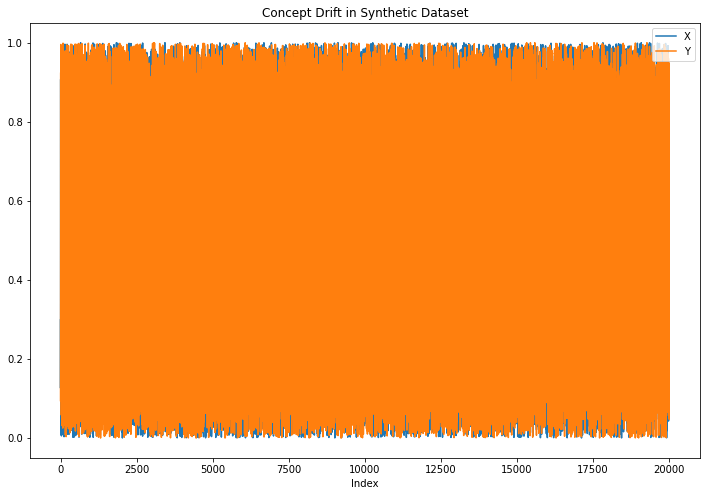

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Load data and labels from files
data = np.loadtxt('synthetic_data.txt', delimiter='\t')
labels = np.loadtxt('synthetic_labels.txt', delimiter='\t', dtype='str')

# Get indices for each type of anomaly
point_anomalies_idx = np.where(labels[:, 0] == 'point_anomaly')[0]
freq_change_idx = np.where(labels[:, 0] == 'sudden_frequency_change')[0]
cont_drift_idx = np.where(labels[:, 0] == 'continuous_concept_drift')[0]
mean_change_idx = np.where(labels[:, 0] == 'sudden_mean_change')[0]

# Plot data and concept drift
plt.figure(figsize=(12, 8))
plt.plot(data[:, 0], label='X')
plt.plot(data[:, 1], label='Y')

# Plot vertical lines to show concept drift
for idx in freq_change_idx:
    plt.axvline(idx, color='g', linestyle='--', alpha=0.5, label='sudden_frequency_change')
for idx in cont_drift_idx:
    plt.axvline(idx, color='r', linestyle='--', alpha=0.5, label='continuous_concept_drift')
for idx in mean_change_idx:
    plt.axvline(idx, color='b', linestyle='--', alpha=0.5, label='sudden_mean_change')

plt.legend()
plt.title('Concept Drift in Synthetic Dataset')
plt.xlabel('Index')
plt.show()


/tmp/ipykernel_1285661/1663676099.py:5: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  labels = np.genfromtxt('synthetic_labels.txt', delimiter='\t', dtype=None, names=['anomaly_type', 'class', 'anomaly_score'])


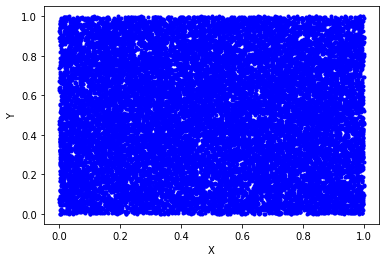

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Read labels file
labels = np.genfromtxt('synthetic_labels.txt', delimiter='\t', dtype=None, names=['anomaly_type', 'class', 'anomaly_score'])

# Extract drift information
drift_start = None
drift_end = None
for i in range(len(labels)):
    if labels['anomaly_type'][i] == b'frequency_change':
        if drift_start is None:
            drift_start = i
        else:
            drift_end = i
            break

# Plot drift line
if drift_start is not None and drift_end is not None:
    plt.axvline(x=drift_start, color='r')
    plt.axvline(x=drift_end, color='r')
    plt.text((drift_start + drift_end) / 2, 0.5, 'Concept drift', ha='center', va='bottom', color='r')
    
# Plot data
data = np.genfromtxt('synthetic_data.txt', delimiter='\t')
plt.plot(data[:, 0], data[:, 1], 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


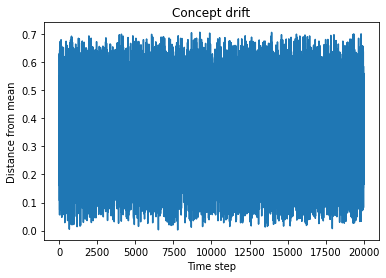

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('synthetic_data.txt', delimiter='\t')
labels = np.loadtxt('synthetic_labels.txt', delimiter='\t', dtype='str')

# Extract time steps with concept drift
drift_steps = []
for i in range(len(labels)):
    if labels[i, 0] == 'concept_drift':
        drift_steps.append(i)

# Calculate mean of data
data_mean = np.mean(data, axis=0)

# Calculate distance from mean for each time step
dist_from_mean = np.linalg.norm(data - data_mean, axis=1)

# Plot concept drift
plt.plot(dist_from_mean)
plt.vlines(drift_steps, ymin=0, ymax=np.max(dist_from_mean), colors='r', linestyle='--')
plt.xlabel('Time step')
plt.ylabel('Distance from mean')
plt.title('Concept drift')
plt.show()


0.999984


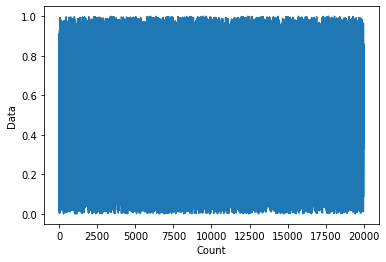

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Read the data file
data = np.loadtxt('synthetic_data1.txt')

print(max(data))

# Plot a single line graph
plt.plot(np.arange(1, 20001), data)
plt.xlabel('Count')
plt.ylabel('Data')
plt.show()



0.0    10362
1.0     3137
Name: anomaly_score, dtype: int64


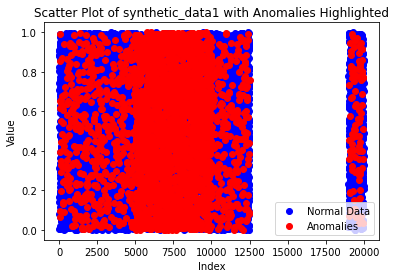

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from files
data = pd.read_csv('synthetic_data1.txt', sep='\t', header=None, names=['X'])
labels = pd.read_csv('synthetic_labels1.txt', sep='\t', header=None, names=['anomaly_type', 'class', 'anomaly_score'])

# Merge data and labels
df = pd.concat([data, labels], axis=1)

#print(df.info)

unique_counts = df['anomaly_score'].value_counts()
print(unique_counts)

# Create separate dataframes for anomalies and normal data points
anomalies = df[df['anomaly_score'] == 1]
normal = df[df['anomaly_score'] == 0]

# Create scatter plot
plt.scatter(normal.index, normal['X'], color='blue', label='Normal Data')
plt.scatter(anomalies.index, anomalies['X'], color='red', label='Anomalies')

# Set plot title and labels
plt.title('Scatter Plot of synthetic_data1 with Anomalies Highlighted')
plt.xlabel('Index')
plt.ylabel('Value')

# Show legend
plt.legend()

# Show plot
plt.show()
